# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np #(feel like I might need this as well?)

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID" )
# merged_data = pd.merge(study_results, mouse_metadata, how="outer", on="Mouse ID" )
# merged_data = pd.merge(study_results, mouse_metadata how="left", on="Mouse ID" )

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
# import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID" )

# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [ ]:
# merged_data.describe() #my added note

In [3]:
# Checking the number of mice.
mouse_count = merged_data['Mouse ID'].nunique()
mouse_count

249

In [ ]:
# Checking the number of mice.
mouse_count = merged_data['Mouse ID'].nunique()
mouse_count

249

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint (is this just a statement and not an actual exercise?)
# merged_data['Unique ID'] = merged_data['Mouse ID'].astype(str) + '_' + merged_data['Timepoint'].astype(str)
# merged_data.head()

# unique_df = merged_data.groupby(['Mouse ID', 'Timepoint'])
# unique_df

In [4]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice_ID_duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()
mice_ID_duplicates
#not sure how to pull it in the array format

# mice_ID_duplicates = merged_data[merged_data.duplicated(keep=False)]
# mice_ID_duplicates

array(['g989'], dtype=object)

In [105]:
# #irrelavent
# # data = {'A': [1, 2, 3], 'B': [4, 5, 6]}
# df = pd.DataFrame(data)

# # Convert the DataFrame to a NumPy array
# array_output = df.to_numpy()

# array_output_df = df.values
# array_output_df

In [ ]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicates = merged_data.loc[merged_data['Mouse ID'] == 'g989'] #further filter option
# all_duplicates = merged_data[merged_data.duplicated('Mouse ID')]
all_duplicates
#not quite getting all the numbers shown below

# all_duplicates = merged_data[merged_data.duplicated('Mouse ID', keep=False)] #don't want keep=False, which shows the first instances of the duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [ ]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicates = merged_data[merged_data.duplicated('Mouse ID')]
all_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.loc[merged_data['Mouse ID'] != 'g989'] #true filteration of not including the duplicates
clean_df.head()

# clean_df = merged_data.drop_duplicates(subset='Mouse ID')
# clean_df.head()

# clean_df = merged_data.drop_duplicates(subset='Mouse ID', keep='first')

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# clean_df = merged_data.drop_duplicates(subset='Mouse ID')
# clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = clean_df['Mouse ID'].nunique()
# new_mouse_count = clean_df['Mouse ID'].value_counts() #shows and the number for each mouse ID
new_mouse_count

248

In [ ]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count = clean_df['Mouse ID'].count()

248

## Summary Statistics

In [8]:
clean_df.describe().head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,19.606383,50.435293,1.025000,12.757979,25.660106
std,14.094238,8.914197,1.139971,7.181998,3.935064
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000


In [9]:
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

#group by regimen
mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

#new data frame
new_df = pd.DataFrame({
        'Mean Tumor Volume': mean,
        'Median Tumor Volume': median,
        'Tumor Volume Variance': variance,
        'Tumor Volume Std Dev': std_dev,
        'Tumor Volume Std Err': sem
})
new_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
adv_new_df = clean_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std', 'sem']})
adv_new_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [ ]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

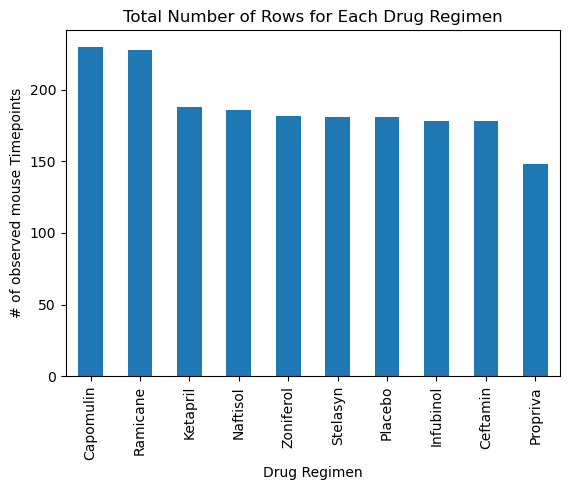

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = clean_df['Drug Regimen'].value_counts() #counting rows for num of regimens
regimen_counts.plot(kind='bar', figsize=(5.8, 5)) #creating bar plot

# regimen_counts.plot(kind='bar', figsize=(5.8, 4), color='steelblue')
# regimen_counts.plot(kind='bar', figsize=(5.8,4), color='blue', alpha=.8) #adds transparency to the color when adding alpha, don't need color
#it will automatically match aparently

# Add titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed mouse Timepoints')

#plotting
# plt.xticks(rotation=45) - if want to add rotation to x-axis labels
plt.tight_layout()
plt.show()

#I did it!

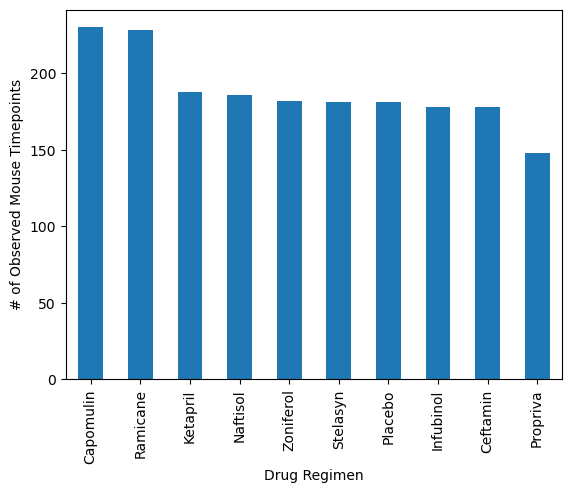

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

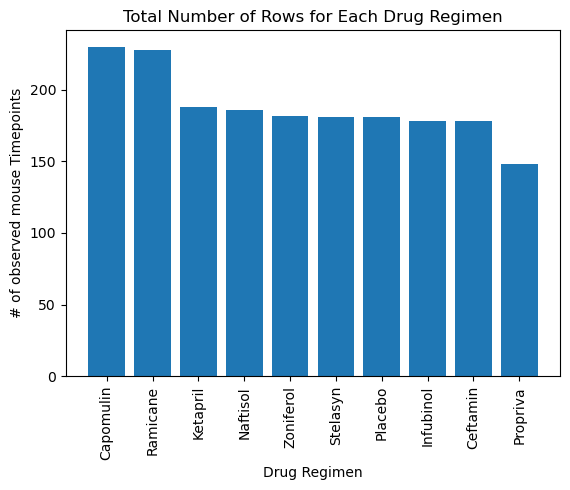

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = clean_df['Drug Regimen'].value_counts() #counting rows for num of regimens
plt.figure(figsize=(5.8, 5))
plt.bar(regimen_counts.index, regimen_counts.values)
# plt.bar(regimen_counts.index, regimen_counts.values, color='dodgerblue')

# Add titles and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed mouse Timepoints')

#plotting
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# I did it!

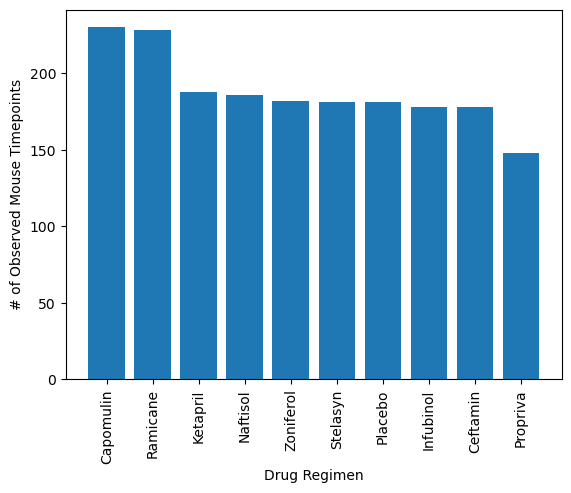

In [ ]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

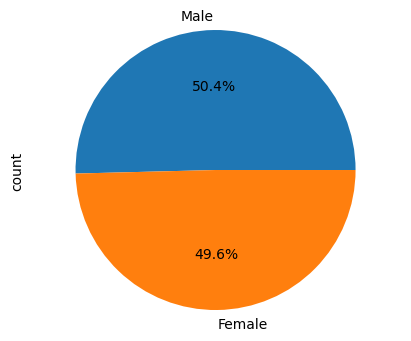

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender = clean_df.loc[:,['Mouse ID','Sex']].drop_duplicates()
gender_counts = gender['Sex'].value_counts() #looks like my percentages are a bit off?
# gender_counts = merged_data['Sex'].value_counts() what I had originally

# Make the pie chart
# gender_counts.plot(kind='pie', figsize=(4.5, 5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4.8, 4))
# gender_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(4.5, 5), startangle=180)

#what does autopct mean?
#do you always have to have a startingangle? - no, it looks like by default it will do 180

# Add title
# plt.title('Distribution of Unique Female vs Male Mice')

# Show the plot
plt.ylabel('count')  # Hide the y-label for better aesthetics by entering in ('')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

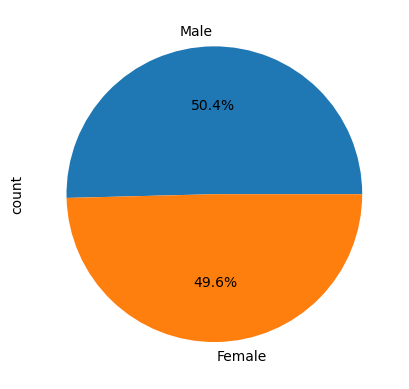

In [ ]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

# Make the pie chart

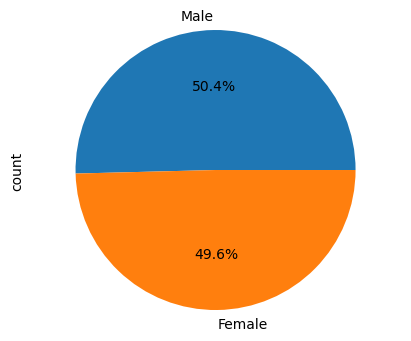

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = gender['Sex'].value_counts()

# Make the pie chart
plt.figure(figsize=(4.8, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
# plt.pie(gender_counts, labels=gender_counts, autopct='%1.1f%%', startangle=180)

#what does index do for the above exercise - looks like it gives the actual string labels versus the int variables?

# Show the plot
plt.ylabel('count')  # Hide the y-label for better aesthetics by entering in ('')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

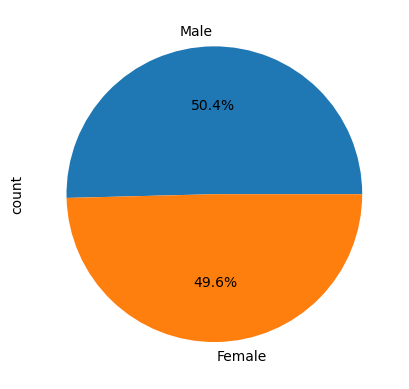

In [ ]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
# treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
# final_tumor_volumes.rename(columns={'Tumor Volume (mm3)': 'Final Tumor Volume (mm3)'}, inplace=True) # Rename the column for clarity - my added note
# final_tumor_volumes

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
second_merge_df = final_tumor_vol.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left') 
#can think about doing an outer and inner(default if not specified) joins as well
second_merge_df.head()

#looks like I have an x and y tumor columns

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] #list needed for reference (go over box plot exercise in class)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for drug in treatment_regimens: 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    row_data = second_merge_df.loc[second_merge_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)']

    # add subset
    tumor_vol.append(row_data)

    # Determine outliers using upper and lower bounds
    quartiles = row_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = row_data.loc[(row_data<lower_bound)|(row_data>upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


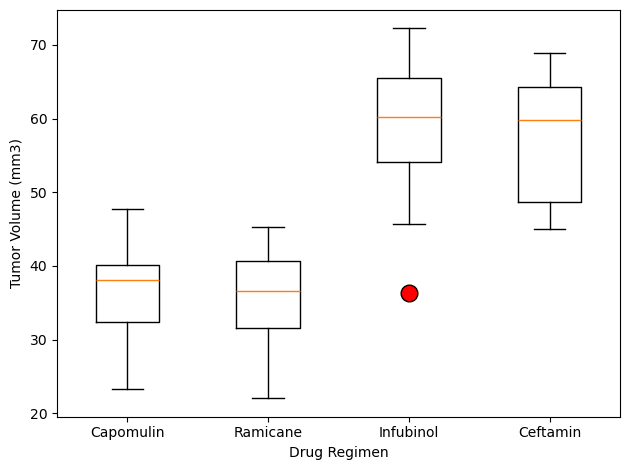

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, tick_labels=treatment_regimens, flierprops={'markerfacecolor': 'red', 'markersize': '12'}) #removes the hyperlink info generated when running the above code

# plt.figure(figsize=(1, 1))
# tumor_vol.boxplot(column='Tumor Volume (mm3)_x', by='Drug Regimen', grid=False)
#not sure which column or if there should onl be one tumor column I should be puling from?

#labels
plt.title('') #plt.title(Distribution of tumor volumes per treatment regimen)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

plt.tight_layout()
plt.show()

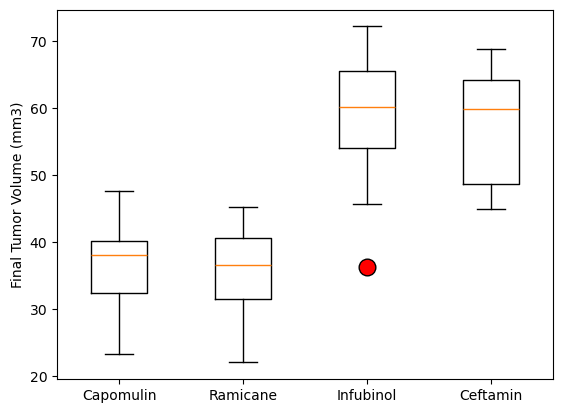

In [ ]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [17]:
mouse_id = 'l509'  # Replace with the actual mouse ID you want to plot
mouse_data = clean_df[clean_df['Mouse ID'] == mouse_id]
mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21
1146,l509,25,44.006257,2,Capomulin,Male,17,21
1414,l509,30,44.708055,2,Capomulin,Male,17,21
1499,l509,35,40.207288,2,Capomulin,Male,17,21
1723,l509,40,40.770813,2,Capomulin,Male,17,21
1771,l509,45,41.483008,3,Capomulin,Male,17,21


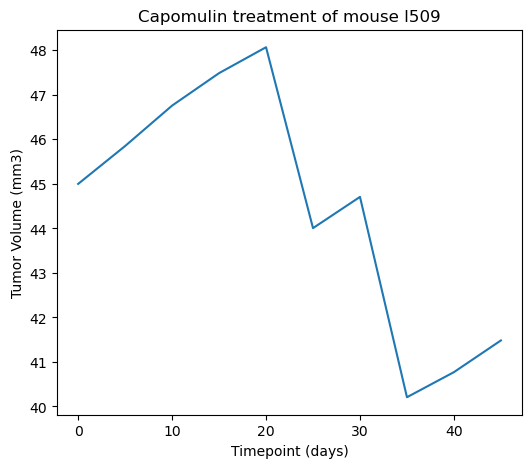

In [18]:
mouse_id = 'l509'  # Replace with the actual mouse ID you want to plot
mouse_data = clean_df[clean_df['Mouse ID'] == mouse_id] #data frame with required columns such as Mouse Id, Timpepoint ect
# capomulin = 'Capomulin'
# drug_choice = clean_df[clean_df['Capomulin'] == capomulin]

#filtering a new Df for specific drug and mouse ID
# capomulin_mouse_treatment = clean_df[(mouse_data)]

plt.figure(figsize=(6, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
# plt.plot(second_merge_df['Timepoint'], second_merge_df['Tumor Volume (mm3)'], marker='o', linestyle='-', color='b')
plt.title('Capomulin treatment of mouse l509')
# plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} Treated with Capomulin')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
# plt.xticks(clean_df['Timepoint'])  # Set x-ticks to the time points
plt.show()

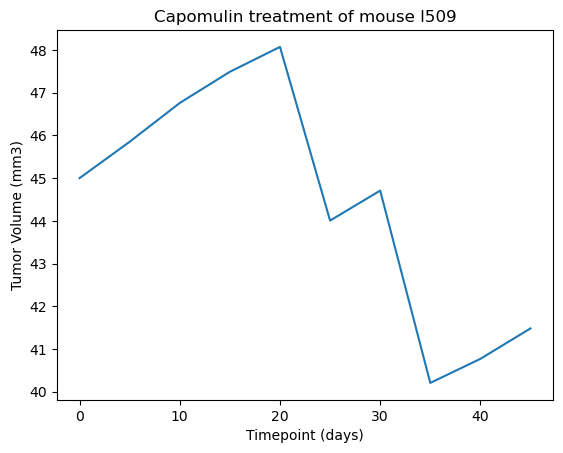

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

In [20]:
# #this checked to see if it was a df, which it wasn't
# print(type(tumor_vol))

# #convert to a df
# tumor_vol = pd.DataFrame(tumor_vol)
# tumor_vol

# #not sure if it's the right df though...

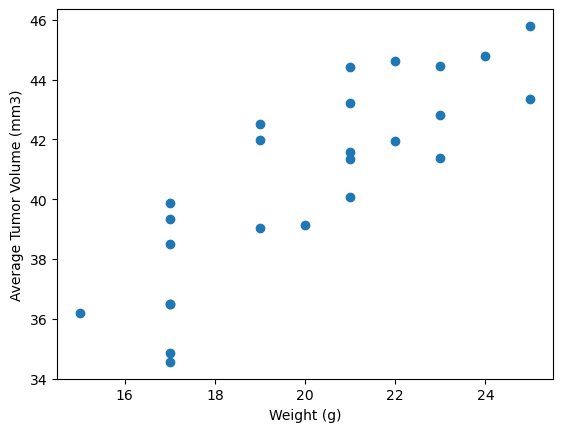

In [19]:
#Just the Capomulin
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']
# capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin'] #also works?
#mean of tumor vol
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

#plotting
plt.scatter(mouse_weight, avg_tumor_volume) #set up is like a normal plotting parenthesis (x,y)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

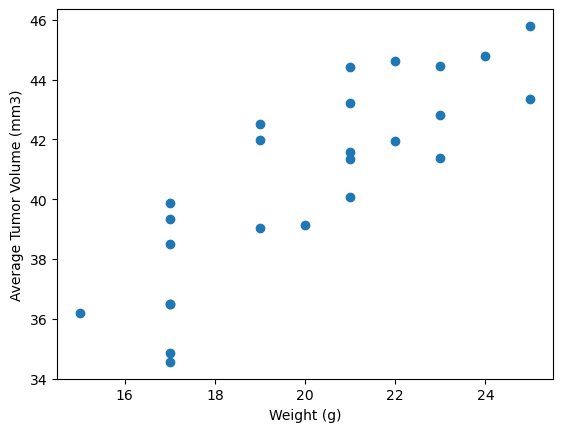

In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

## Correlation and Regression

In [20]:
#additional import?
from scipy.stats import linregress

In [53]:
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
float(correlation[0])

0.8419363424694721

In [21]:
#correlation
correlation = st.pearsonr(mouse_weight, avg_tumor_volume)
# correlation = capomulin_data['Weight (g)'].corr(capomulin_data['Tumor Volume (mm3)'])
# correlation = merged_data['Weight (g)'], merged_data['Tumor volume (mm3)']
correlation_val = correlation[0]
print(f"Correlation coefficient: {correlation_val}")

# slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)
slope, intercept, _, _, _ = linregress(mouse_weight, avg_tumor_volume)
# slope, intercept, r_value, p_value, std_err = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
# float(correlation[0])

#Create the regression line
regression_line = slope * capomulin_data['Weight (g)'] + intercept
# regression_line = slope * mouse_weight + intercept

Correlation coefficient: 0.8419363424694721


In [76]:
#Create the regression line
regression_line = slope * capomulin_data['Weight (g)'] + intercept
# regression_line = slope * mouse_weight + intercept

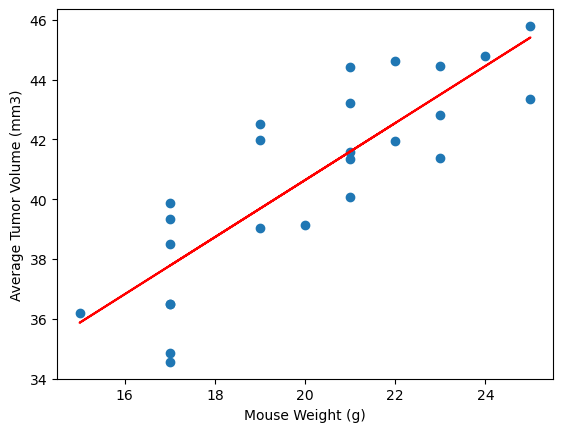

The correlation between mouse weight and average tumor volume is 0.8419363424694721


In [22]:
#Plot the results
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(capomulin_data['Weight (g)'], regression_line, color='red', label='Regression Line')

# plt.plot(mouse_weight, regression_line, color='red', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
# plt.title('Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
# plt.legend()
plt.show()

print(f'The correlation between mouse weight and average tumor volume is {correlation_val}')
#got it!

The correlation between mouse weight and the average tumor volume is 0.84


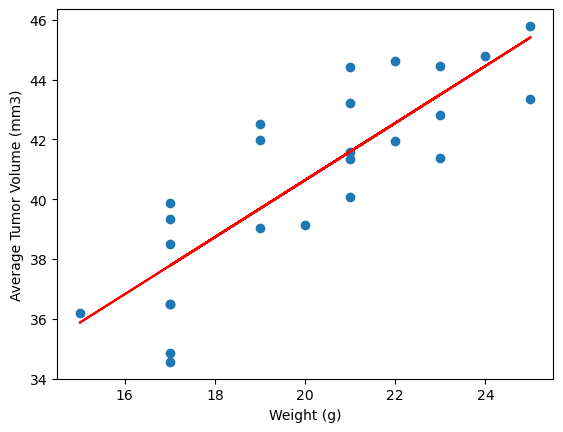

In [ ]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen